Trying to make cross section from shapefile FILH (Finding Images from Linked Hydrology) tool. The purpose of this tool is to allow users 

In [21]:
import nldi_xstool
import geopandas

%matplotlib inline
from nldi_xstool.XSGen import XSGen
from nldi_xstool.ancillary import query_dems_bbox
import py3dep
from pynhd import NLDI, NHDPlusHR, WaterData
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataretrieval.nwis as nwis
import urllib.request, json 



In [22]:
nldi = NLDI()

Read in shape files

In [23]:
mainstemFile = "../Matilija_gis_files/MatilijaCreek_mainstem.shp"
mainstemShapefile = geopandas.read_file(mainstemFile)
mainstemShapefile.geometry.name
#mainstemShapefile['centroid_column'] = mainstemShapefile.centroid
mainstemShapefile

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,LengthKM,ReachCode,FlowDir,WBArea_Per,FType,FCode,MainPath,InNetwork,Visibility,Shape_Leng,geometry
0,514746.0,26488429,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.037000,18070101000077,1,None,460,46003,0,1,0,0.000348,"LINESTRING Z (-119.39088 34.51163 0.00000, -11..."
1,781465.0,26488461,2014/12/09 00:00:00.000,2,00272369,Matilija Creek,1.237279,18070101000075,1,None,460,46006,0,1,0,0.013019,"LINESTRING Z (-119.38276 34.50633 0.00000, -11..."
2,914543.0,26488423,2014/12/09 00:00:00.000,2,00272369,Matilija Creek,0.439258,18070101000077,1,None,460,46006,0,1,0,0.004764,"LINESTRING Z (-119.39552 34.51226 0.00000, -11..."
3,1447606.0,26488445,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.102000,18070101000077,1,None,460,46006,0,1,0,0.001088,"LINESTRING Z (-119.38787 34.51018 0.00000, -11..."
4,1780845.0,26488451,2014/12/09 00:00:00.000,2,00272369,Matilija Creek,0.369113,18070101000076,1,None,460,46006,0,1,0,0.003524,"LINESTRING Z (-119.38366 34.50906 0.00000, -11..."
5,1981259.0,26488441,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.370000,18070101000077,1,None,460,46006,0,1,0,0.003811,"LINESTRING Z (-119.39071 34.51135 0.00000, -11..."
6,1981260.0,26488449,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.315000,18070101000077,1,None,460,46006,0,1,0,0.003369,"LINESTRING Z (-119.38684 34.50997 0.00000, -11..."


In [24]:
# https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=11114495

streamSegmentsFromShapeFile = mainstemShapefile
streamSegmentsFromShapeFile

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,LengthKM,ReachCode,FlowDir,WBArea_Per,FType,FCode,MainPath,InNetwork,Visibility,Shape_Leng,geometry
0,514746.0,26488429,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.037000,18070101000077,1,None,460,46003,0,1,0,0.000348,"LINESTRING Z (-119.39088 34.51163 0.00000, -11..."
1,781465.0,26488461,2014/12/09 00:00:00.000,2,00272369,Matilija Creek,1.237279,18070101000075,1,None,460,46006,0,1,0,0.013019,"LINESTRING Z (-119.38276 34.50633 0.00000, -11..."
2,914543.0,26488423,2014/12/09 00:00:00.000,2,00272369,Matilija Creek,0.439258,18070101000077,1,None,460,46006,0,1,0,0.004764,"LINESTRING Z (-119.39552 34.51226 0.00000, -11..."
3,1447606.0,26488445,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.102000,18070101000077,1,None,460,46006,0,1,0,0.001088,"LINESTRING Z (-119.38787 34.51018 0.00000, -11..."
4,1780845.0,26488451,2014/12/09 00:00:00.000,2,00272369,Matilija Creek,0.369113,18070101000076,1,None,460,46006,0,1,0,0.003524,"LINESTRING Z (-119.38366 34.50906 0.00000, -11..."
5,1981259.0,26488441,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.370000,18070101000077,1,None,460,46006,0,1,0,0.003811,"LINESTRING Z (-119.39071 34.51135 0.00000, -11..."
6,1981260.0,26488449,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.315000,18070101000077,1,None,460,46006,0,1,0,0.003369,"LINESTRING Z (-119.38684 34.50997 0.00000, -11..."


In [25]:
crossSectionloc = mainstemShapefile.iloc[:1]
crossSectionloc

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,LengthKM,ReachCode,FlowDir,WBArea_Per,FType,FCode,MainPath,InNetwork,Visibility,Shape_Leng,geometry
0,514746.0,26488429,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.037,18070101000077,1,None,460,46003,0,1,0,0.000348,"LINESTRING Z (-119.39088 34.51163 0.00000, -11..."


Replacing geometry value with a point to follow example code

In [26]:
crossSectionloc['geometry']= crossSectionloc.representative_point()

/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [27]:
crossSectionloc

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,LengthKM,ReachCode,FlowDir,WBArea_Per,FType,FCode,MainPath,InNetwork,Visibility,Shape_Leng,geometry
0,514746.0,26488429,2012/01/24 13:06:41.000,2,00272369,Matilija Creek,0.037,18070101000077,1,None,460,46003,0,1,0,0.000348,POINT Z (-119.39073 34.51150 0.00000)


<AxesSubplot:>

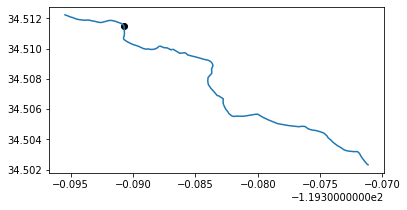

In [28]:
ax = plt.subplot(111)
#gagebasin.plot(ax=ax)
streamSegmentsFromShapeFile.plot(ax=ax)
crossSectionloc.plot(ax=ax, color='black')

In [57]:
def closestComid(x, y):
    return nldi.comid_byloc((x, y)).iloc[0]
    #urlStringPrefix = 'https://labs.waterdata.usgs.gov/api/nldi/linked-data/comid/position?f=json&coords=POINT('
    #return urlStringPrefix + str(x) + " " + str(y) +")"

In [58]:
#locationCoords = crossSectionloc.geometry[0].coords
#print(crossSectionloc.geometry)
#url = makeUrlForComID(locationCoords)
#print(locationCoords)
#print(url)
#strmseg_loc = nldi.getfeature_byid("coords", locationCoords).to_crs('epsg:3857') 

# TODO - dynamically update url for given coords

clostest_comid_to_coords = closestComid(-119.39088, 34.51163)


In [64]:
clostest_comid_to_coords

geometry      LINESTRING (-119.404570103 34.517660595, -119....
type                                                           
source                                                    comid
sourceName                                        NHDPlus comid
identifier                                             17585758
name                                                           
uri                                                            
comid                                                  17585758
navigation    https://labs.waterdata.usgs.gov/api/nldi/linke...
Name: (-119.39088, 34.51163), dtype: object

In [61]:
comid = clostest_comid_to_coords["comid"]

In [65]:
strmseg_loc = nldi.getfeature_byid("comid", comid).to_crs('epsg:3857')
# may be redendent to above step

In [63]:
strmseg_loc

,,geometry,type,source,sourceName,identifier,name,uri,comid,navigation
17585758,0,"LINESTRING (-13292055.942 4098524.812, -132919...",,comid,NHDPlus comid,17585758,,,17585758,https://labs.waterdata.usgs.gov/api/nldi/linke...


In [13]:
len(strmseg_loc.geometry[0].coords)

19

In [14]:
strmseg_loc.geometry[0].coords

19


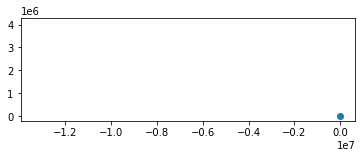

In [17]:
# print(geomfeat.head(), geom2afeat.head())
xs = XSGen(point=crossSectionloc, cl_geom=strmseg_loc, ny=101, width=1000, tension=0.5)
xs_line = xs.get_xs()
ax = plt.subplot(111)
crossSectionloc.plot(ax=ax)
strmseg_loc.plot(ax=ax)
#xs_line.plot(ax=ax)
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
#xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
plt.show()


In [ ]:
xs_line

In [ ]:
xs.get_strm_seg_spline()

In [ ]:


print(type(xs_line.envelope.bounds))
print(xs_line.envelope.bounds)
print(strmseg_loc.to_crs('epsg:4326'))



In [ ]:


xs_line_geom = xs_line.to_crs('epsg:4326')
print(xs_line_geom)
bbox = xs_line_geom.geometry[0].envelope.bounds
print(bbox)
query = query_dems_bbox(bbox)
print(query)



In [ ]:


bbox = xs_line.geometry[0].bounds



In [ ]:


width = abs(bbox[0]-bbox[2])
height = abs(bbox[1]-bbox[3])
print(width, height)



In [ ]:


bb = xs_line.buffer(100)
bb.geometry[0].bounds



In [ ]:


bb1 = (xs_line.total_bounds) - ((100., 100., -100., -100.))
tuple(bb1)



In [ ]:


#Buffer bounding box of cross-section otherwise interpolation with elevation below returns nans near end points
xs_line_geom = xs_line.to_crs('epsg:3857')
print(xs_line_geom)
t1 = (xs_line_geom.total_bounds) + ((-100.,-100.,100., 100.))
dem = py3dep.get_map("DEM", tuple(t1), resolution=10, geo_crs="EPSG:3857", crs="epsg:3857")

ax = plt.subplot(111)
strmseg_loc.plot(ax=ax)
xs_line_geom.plot(ax=ax, colors='black')
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
dem.plot(ax=ax)
crossSectionloc.plot(ax=ax)
ax.axis('equal')
# plt.tight_layout()



In [ ]:


x,y = xs.get_xs_points()
dsx = xr.DataArray(x, dims='z')
dsy = xr.DataArray(y, dims='z')
dsi = dem.interp(x=('z',x), y=('z',y))
dsi.plot()
print(type(dsi))



In [ ]:


pdsi = dsi.to_dataframe()
x = dsi.coords['x'].values -dsi.coords['x'].values[0]
y = dsi.coords['y'].values -dsi.coords['y'].values[0]
dist = np.hypot(x,y)
print(dist)
pdsi['distance'] = dist
pdsi



In [ ]:
values = dsi.values
lmi = np.where(values == max(values[:49]))[0][0]
rmi = np.where(values == max(values[50:]))[0][0]
print(lmi,rmi, values[lmi], values[rmi])

In [ ]:
dsi[lmi:rmi].plot()

In [ ]:
x = dsi.coords['x'].values[lmi:rmi] -dsi.coords['x'].values[lmi]
y = dsi.coords['y'].values[lmi:rmi] -dsi.coords['y'].values[lmi]
dist = np.hypot(x,y)
elev = dsi.values[lmi:rmi]
tlen = len(dist)
# print(tlen)
sta2 = np.zeros((tlen,2))
t = []
for index,(tx,ty) in enumerate(zip(dist,elev)):
    if not np.isnan(ty):
        a = np.array((tx,ty))
        sta2[index] = a
#         print(a)
    else:
        t.append(index)